# Simulating Network Deliberation 

In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand

In [2]:
# Import NetworkX
import networkx as nx
import numpy as np

In [3]:
import numpy as np

### Assign nodes to groups 

In [4]:
from learning import *

In [5]:
from topologies import *

## Clique

In [6]:
def clique_topology(learning_strategy, true_value):
    '''Simulates a learning strategy in a completely connected network 
    #Paramaters 
    G: it has to take a G parameter to try different networks (SW, karate, etc...)
    learning strategy: the algortihm use to update participants beliefs over time 
    true value: the ground truth each participant is trying to reach
    
    #Return 
    the beliefs at all stages 
    '''

    N = 100 #num of participants(nodes)
    M = 5 #group size
    stages = 5  #stages
    steps = 5 #number of steps in each learning stratey
    G = nx.complete_graph(N)
    #nx.draw(G)

    beliefs_stages = []
    #print("To keep beliefs after stages", beliefs_stages)

    for stage in range(stages): 
        if stage == 0: 
            ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
            beliefs_stages = [ini_beliefs]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", ini_beliefs)
            beliefs_list =  learn(G, ini_beliefs, learning_strategy, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)

        else:
            sub_ini_beliefs = beliefs_stages[-1]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
            beliefs_list = learn(G, sub_ini_beliefs, learning_strategy, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at", stage, "after learn() are", beliefs_stages)
    return beliefs_stages
    #print("beliefs of all stages", beliefs_stages)


In [7]:
#G = nx.watts_strogatz_graph(100, 4, 0)
#true_value = [1, 1, 1, 0, 1, 0, 1, 1, 0, 1] #ground truth 
#clique_topology(G, learning_step_best_neighbor, true_value)

## Long path topology

In [8]:
def long_path_topology(learning_strategy, true_value):
    '''Simulates a learning strategy in a long path network 
    #Paramaters 
    learning strategy: the algortihm use to update participants beliefs over time 
    true value: the ground truth each participant is trying to reach
    
    #Return 
    the beliefs at all stages 
    
    '''

    ##Uses a long path topology

    N = 100 #num of participants(nodes)
    M = 5 #group size
    stages = 5  #stages
    true_value = [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1] #ground truth #true_value = [1,0,1,0]
    steps = 5 #number of steps in each learning stratey



    beliefs_stages = []
    #print("To keep beliefs after stages", beliefs_stages)


    for stage in range(stages):
        groups = get_long_path_stage_groups(N, M, stage)
        #print("all the groups", groups)
        G = nx.Graph()
        for group in groups:
            #print("group in groups", group) #nodes to form clique network
            g = nx.complete_graph(group) #clique network
            #print("clique network", g.nodes())
            #nx.draw(g)
            G = nx.union(G,g)
        #print("All the edges in graph G are", G.nodes())
        #nx.draw(G)
        if stage == 0: 
            ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
            beliefs_stages = [ini_beliefs]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", ini_beliefs)
            beliefs_list =  learn(G, ini_beliefs, most_popular_list, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)

        else:
            sub_ini_beliefs = beliefs_stages[-1]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
            beliefs_list = learn(G, sub_ini_beliefs, most_popular_list, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at", stage, "after learn() are", beliefs_stages)

    return beliefs_stages

## Random Topology

In [9]:
def random_topology(learning_strategy, true_value):
    '''Simulates a learning strategy in a random network 
    #Paramaters 
    learning strategy: the algortihm use to update participants beliefs over time 
    true value: the groun truth each participant is trying to reach
    
    #Return 
    the beliefs at all stages 
    '''

    N = 100 #num of participants(nodes)
    M = 5 #group size
    stages = 5  #stages
    steps = 5 #number of steps in each learning stratey


    beliefs_stages = []
    #print("To keep beliefs after stages", beliefs_stages)

    for stage in range(stages):
        groups = get_random_stage_groups(N, M, stage)
        #print("all the groups", groups)
        G = nx.Graph()
        for group in groups:
            #print("group in groups", group) #nodes to form clique network
            g = nx.complete_graph(group) #clique network
            #print("clique network", g.nodes())
            #nx.draw(g)
            #adds cliques to a network 
            G = nx.union(G,g)
        #print("All the edges in graph G are", G.nodes())
        #nx.draw(G)
        if stage == 0: 
            ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
            beliefs_stages = [ini_beliefs]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", ini_beliefs)
            beliefs_list =  learn(G, ini_beliefs, learning_step_best_neighbor, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)

        else:
            sub_ini_beliefs = beliefs_stages[-1]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
            beliefs_list = learn(G, sub_ini_beliefs, learning_step_best_neighbor, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at", stage, "after learn() are", beliefs_stages)

    #print("beliefs of all stages", beliefs_stages)
    return beliefs_stages

In [10]:
def run_trial(G, learning_strategy, true_value):
    """
    Plots the fraction of correct nodes in all stages of a simulation
    
    #Parameters:
    G: topology
    learning strategy: learning strategy to simulate in topology
    plot: plotting function used to plot beliefs  (fixed for now)
    true_value = the ground truth 
    stages: for now is fixed, eventually will change. (fixed for now) 
    
    return
    plots the beliefs all stages
    """
    beliefs_stages = G(learning_strategy, true_value)
    plot_beliefs_correct(beliefs_stages, true_value)

In [11]:
#G = long_path_topology
#learning_strategy = random_neighbor_bit
#true_value = [1, 1, 1, 0, 1, 0, 1 ,1 ,1, 1, 1]


#run_trial(G, learning_strategy, true_value)

# Plotting

In [ ]:
##Need to pass steps to plot function

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


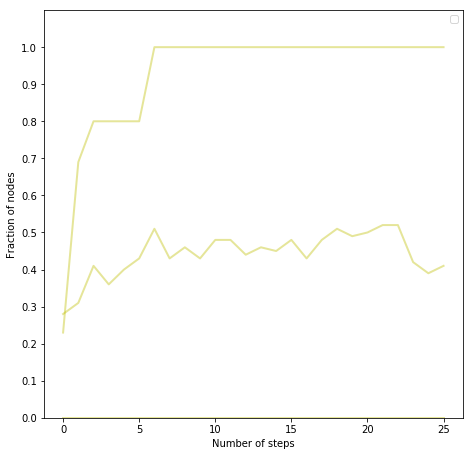

In [27]:
#(options = clique, long path and random)
G = clique_topology 
#(options = rand_neighbor_list, random_neighbor_bit, most_popular_list, learning_step_best_neighbor, learning_step_bit_majority)
learning_strategy = random_neighbor_bit
#(options= change as needed)
true_value = [1, 1, 1]
steps = 25

run_trial(G, learning_strategy, true_value)
run_trial(long_path_topology, learning_strategy, true_value), 
run_trial(random_topology, learning_strategy, true_value)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


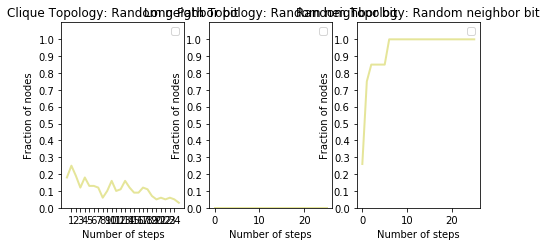

In [20]:
#(options = clique, long path and random)
G = clique_topology 
#(options = rand_neighbor_list, random_neighbor_bit, most_popular_list, learning_step_best_neighbor, learning_step_bit_majority)
learning_strategy = random_neighbor_bit
#(options= change as needed)
true_value = [1, 1, 1]
steps = 25

#change as needed
plt.subplot(2, 3, 1)
plt.xticks(np.arange(1, steps))
plt.title("Clique Topology: Random neighbor bit")
run_trial(G, learning_strategy, true_value)


plt.subplot(2, 3, 2)
plt.title("Long Path Topology: Random neighbor bit")
run_trial(long_path_topology, learning_strategy, true_value)


plt.subplot(2, 3, 3)
plt.title("Random Topology: Random neighbor bit")
run_trial(random_topology, learning_strategy, true_value)



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


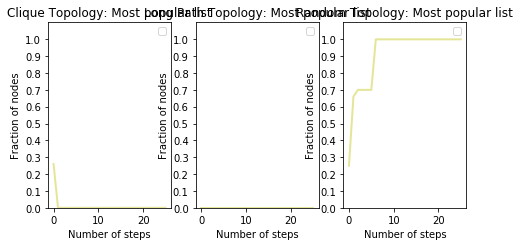

In [13]:
#(options = clique, long path and random)
G = clique_topology 
#(options = rand_neighbor_list, random_neighbor_bit, most_popular_list, learning_step_best_neighbor, learning_step_bit_majority)
learning_strategy = most_popular_list 
#(options= change as needed)
true_value = [1, 1, 1]

#change as needed
plt.subplot(2, 3, 1)
plt.title("Clique Topology: Most popular list")
run_trial(G, learning_strategy, true_value)


plt.subplot(2, 3, 2)
plt.title("Long Path Topology: Most popular list")
run_trial(long_path_topology, learning_strategy, true_value)


plt.subplot(2, 3, 3)
plt.title("Random Topology: Most popular list")
run_trial(random_topology, learning_strategy, true_value)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


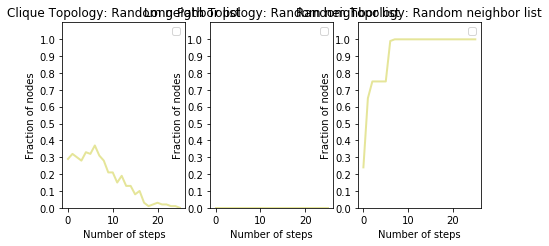

In [14]:
#(options = clique, long path and random)
G = clique_topology 
#(options = rand_neighbor_list, random_neighbor_bit, most_popular_list, learning_step_best_neighbor, learning_step_bit_majority)
learning_strategy = rand_neighbor_list 
#(options= change as needed)
true_value = [1, 1, 1]

#change as needed
plt.subplot(2, 3, 1)
plt.title("Clique Topology: Random neighbor list")
run_trial(G, learning_strategy, true_value)


plt.subplot(2, 3, 2)
plt.title("Long Path Topology: Random neighbor list")
run_trial(long_path_topology, learning_strategy, true_value)


plt.subplot(2, 3, 3)
plt.title("Random Topology: Random neighbor list")
run_trial(random_topology, learning_strategy, true_value)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


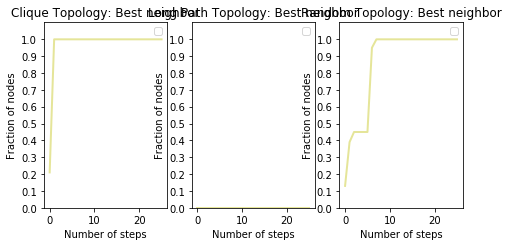

In [15]:
#(options = clique, long path and random)
G = clique_topology 
#(options = rand_neighbor_list, random_neighbor_bit, most_popular_list, learning_step_best_neighbor, learning_step_bit_majority)
learning_strategy = learning_step_best_neighbor 
#(options= change as needed)
true_value = [1, 1, 1]

#change as needed
plt.subplot(2, 3, 1)
plt.title("Clique Topology: Best neighbor")
run_trial(G, learning_strategy, true_value)


plt.subplot(2, 3, 2)
plt.title("Long Path Topology: Best neighbor")
run_trial(long_path_topology, learning_strategy, true_value)


plt.subplot(2, 3, 3)
plt.title("Random Topology: Best neighbor")
run_trial(random_topology, learning_strategy, true_value)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


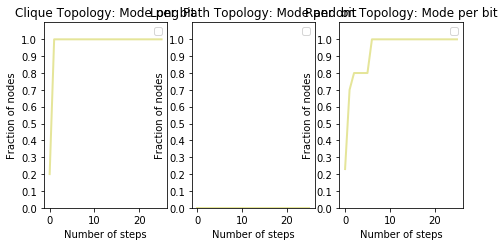

In [16]:
#(options = clique, long path and random)
G = clique_topology 
#(options = rand_neighbor_list, random_neighbor_bit, most_popular_list, learning_step_best_neighbor, learning_step_bit_majority)
learning_strategy = learning_step_bit_majority 
#(options= change as needed)
true_value = [1, 1, 1]

#change as needed
plt.subplot(2, 3, 1)
plt.title("Clique Topology: Mode per bit")
run_trial(G, learning_strategy, true_value)


plt.subplot(2, 3, 2)
plt.title("Long Path Topology: Mode per  bit")
run_trial(long_path_topology, learning_strategy, true_value)


plt.subplot(2, 3, 3)
plt.title("Random Topology: Mode per bit")
run_trial(random_topology, learning_strategy, true_value)

# old plotting code 

# old code 